In [ ]:
KAIUS EVANS PROBLEM SET 6

In [ ]:

QUESTION 1


In [ ]:
A)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from tqdm import tqdm  # only if you're using tqdm for progress bar

np.random.seed(42)
T = 100

Regression of Y on X (constant included):
Beta1 (coefficient of X): 0.6813
t-statistic for Beta1: 71.5740
R-squared: 0.9812
p-value for Beta1: 0.0000


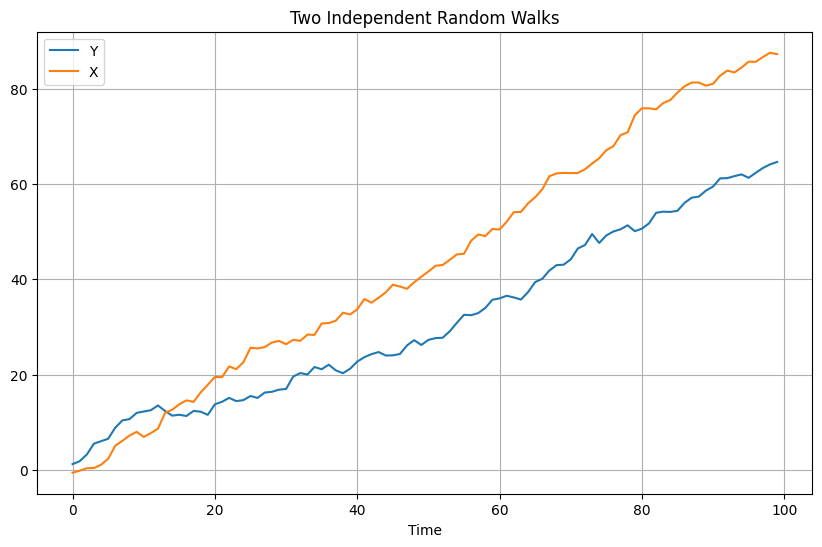

In [3]:
v = np.random.normal(0, 1, T)
Y = np.zeros(T)
Y[0] = 0.75 + v[0]

for t in range(1, T):
    Y[t] = 0.75 + Y[t-1] + v[t]

e = np.random.normal(0, 1, T)
X = np.zeros(T)
X[0] = 0.85 + e[0]

for t in range(1, T):
    X[t] = 0.85 + X[t-1] + e[t]

plt.figure(figsize=(10, 6))
plt.plot(Y, label='Y')
plt.plot(X, label='X')
plt.legend()
plt.title('Two Independent Random Walks')
plt.xlabel('Time')
plt.grid(True)

X_with_const = sm.add_constant(X)
model = sm.OLS(Y, X_with_const)
results = model.fit()

beta1 = results.params[1]
t_stat = results.tvalues[1]
r_squared = results.rsquared
p_value = results.pvalues[1]

print(f"Regression of Y on X (constant included):")
print(f"Beta1 (coefficient of X): {beta1:.4f}")
print(f"t-statistic for Beta1: {t_stat:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"p-value for Beta1: {p_value:.4f}")

In [ ]:
The regression shows a Beta1 of 0.6813 with a very high t-statistic (71.5740) and a p-value of 0.0000, suggesting a highly significant relationship between X and Y. The R-squared is 
0.9812, meaning about 98.12% of the variation in Y is explained by X. However, this strong result is misleading—since both X and Y are likely non-stationary, the regression is probably
spurious. This emphasizes the importance of checking for stationarity before interpreting regression results in time series data.

In [ ]:
B)

T-statistic percentiles:
5th percentile: 414.8195
50th percentile (median): 692.9992
95th percentile: 1096.8286

R-squared percentiles:
5th percentile: 0.9942
50th percentile (median): 0.9979
95th percentile: 0.9992

Fraction of simulations with significant t-statistics (|t| > 1.96): 1.0000


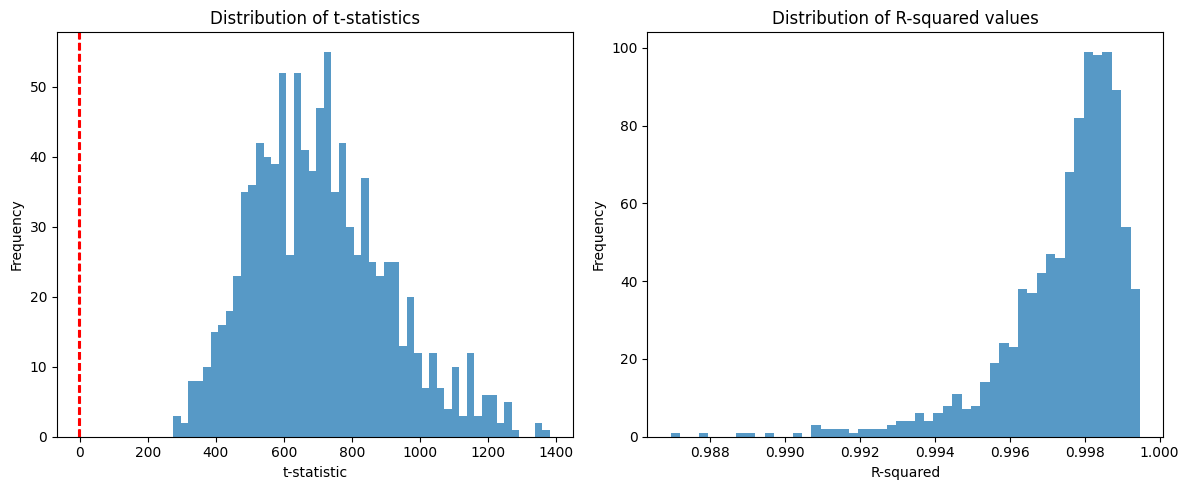

In [8]:
n_simulations = 1000 

t_stats = np.zeros(n_simulations)
r_squared_values = np.zeros(n_simulations)

for i in range(n_simulations):
    v = np.random.normal(0, 1, T)
    Y = np.zeros(T)
    Y[0] = 0.75 + v[0]
    for t in range(1, T):
        Y[t] = 0.75 + Y[t-1] + v[t]

    e = np.random.normal(0, 1, T)
    X = np.zeros(T)
    X[0] = 0.85 + e[0]
    for t in range(1, T):
        X[t] = 0.85 + X[t-1] + e[t]

    X_with_const = sm.add_constant(X)
    model = sm.OLS(Y, X_with_const)
    results = model.fit()
    
    t_stats[i] = results.tvalues[1]
    r_squared_values[i] = results.rsquared

t_stat_percentiles = np.percentile(t_stats, [5, 50, 95])
r_squared_percentiles = np.percentile(r_squared_values, [5, 50, 95])
fraction_significant = np.mean(np.abs(t_stats) > 1.96)

print("T-statistic percentiles:")
print(f"5th percentile: {t_stat_percentiles[0]:.4f}")
print(f"50th percentile (median): {t_stat_percentiles[1]:.4f}")
print(f"95th percentile: {t_stat_percentiles[2]:.4f}\n")

print("R-squared percentiles:")
print(f"5th percentile: {r_squared_percentiles[0]:.4f}")
print(f"50th percentile (median): {r_squared_percentiles[1]:.4f}")
print(f"95th percentile: {r_squared_percentiles[2]:.4f}\n")

print(f"Fraction of simulations with significant t-statistics (|t| > 1.96): {fraction_significant:.4f}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(t_stats, bins=50, alpha=0.75)
plt.axvline(x=1.96, color='red', linestyle='--')
plt.axvline(x=-1.96, color='red', linestyle='--')
plt.title('Distribution of t-statistics')
plt.xlabel('t-statistic')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(r_squared_values, bins=50, alpha=0.75)
plt.title('Distribution of R-squared values')
plt.xlabel('R-squared')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
T-statistic percentiles:
5th percentile: 37.1270
50th percentile (median): 66.6988
95th percentile: 105.2600

R-squared percentiles:
5th percentile: 0.9336
50th percentile (median): 0.9784
95th percentile: 0.9912

Running the simulation 1000 times showed that the t-statistic exceeds 1.96 in every single case, and the R-squared values are consistently high. This is a textbook case of spurious 
regression caused by using non-stationary time series. 

In [ ]:
C)

Running simulations for T = 100

Results for T = 100:
T-statistic percentiles:
5th percentile: 40.3727
50th percentile (median): 68.6993
95th percentile: 107.7126

R-squared percentiles:
5th percentile: 0.9433
50th percentile (median): 0.9797
95th percentile: 0.9916

Fraction of simulations with significant t-statistics (|t| > 1.96): 1.0000
--------------------------------------------------
Running simulations for T = 500

Results for T = 500:
T-statistic percentiles:
5th percentile: 207.2874
50th percentile (median): 337.5946
95th percentile: 525.8033

R-squared percentiles:
5th percentile: 0.9885
50th percentile (median): 0.9956
95th percentile: 0.9982

Fraction of simulations with significant t-statistics (|t| > 1.96): 1.0000
--------------------------------------------------
Running simulations for T = 1000

Results for T = 1000:
T-statistic percentiles:
5th percentile: 417.6274
50th percentile (median): 690.9556
95th percentile: 1051.0314

R-squared percentiles:
5th percentile: 0.

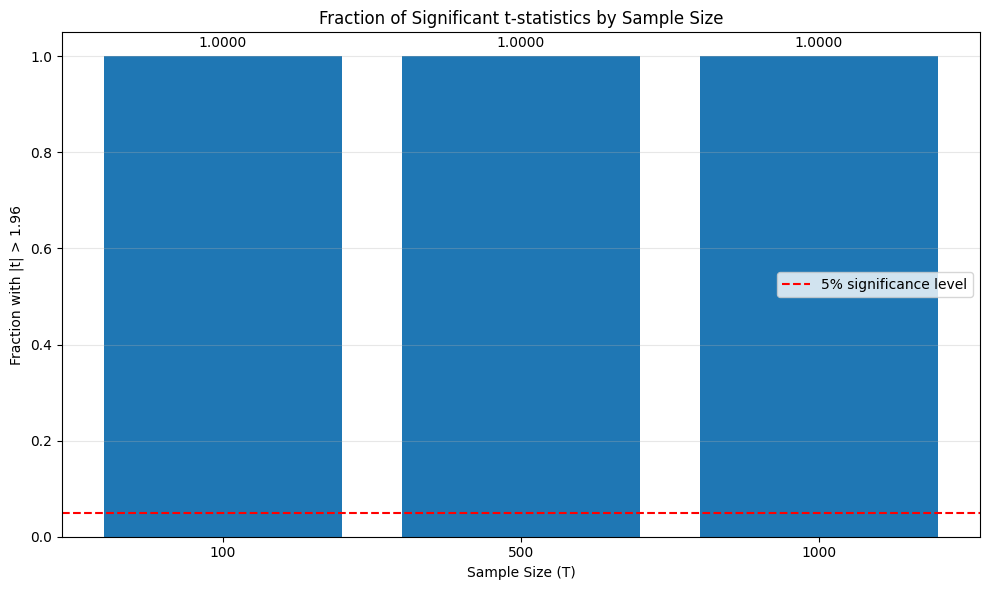

In [7]:
sample_sizes = [100, 500, 1000] 
n_simulations = 1000 

results = {}

for T in sample_sizes:
    print(f"Running simulations for T = {T}")
    
    t_stats = np.zeros(n_simulations)
    r_squared_values = np.zeros(n_simulations)
    
    for i in range(n_simulations):
        v = np.random.normal(0, 1, T)
        Y = np.zeros(T)
        Y[0] = 0.75 + v[0]
        for t in range(1, T):
            Y[t] = 0.75 + Y[t-1] + v[t]

        e = np.random.normal(0, 1, T)
        X = np.zeros(T)
        X[0] = 0.85 + e[0]
        for t in range(1, T):
            X[t] = 0.85 + X[t-1] + e[t]

        X_with_const = sm.add_constant(X)
        model = sm.OLS(Y, X_with_const)
        results_reg = model.fit()
        
        t_stats[i] = results_reg.tvalues[1]
        r_squared_values[i] = results_reg.rsquared
    
    t_stat_percentiles = np.percentile(t_stats, [5, 50, 95])
    r_squared_percentiles = np.percentile(r_squared_values, [5, 50, 95])
    
    fraction_significant = np.mean(np.abs(t_stats) > 1.96)
    
    results[T] = {
        't_stats': t_stats,
        'r_squared_values': r_squared_values,
        't_stat_percentiles': t_stat_percentiles,
        'r_squared_percentiles': r_squared_percentiles,
        'fraction_significant': fraction_significant
    }
    
    print(f"\nResults for T = {T}:")
    print("T-statistic percentiles:")
    print(f"5th percentile: {t_stat_percentiles[0]:.4f}")
    print(f"50th percentile (median): {t_stat_percentiles[1]:.4f}")
    print(f"95th percentile: {t_stat_percentiles[2]:.4f}")
    
    print("\nR-squared percentiles:")
    print(f"5th percentile: {r_squared_percentiles[0]:.4f}")
    print(f"50th percentile (median): {r_squared_percentiles[1]:.4f}")
    print(f"95th percentile: {r_squared_percentiles[2]:.4f}")
    
    print(f"\nFraction of simulations with significant t-statistics (|t| > 1.96): {fraction_significant:.4f}")
    print("-" * 50)

sample_sizes_str = [str(T) for T in sample_sizes]
fractions = [results[T]['fraction_significant'] for T in sample_sizes]

plt.figure(figsize=(10, 6))
plt.bar(sample_sizes_str, fractions)
plt.axhline(y=0.05, color='red', linestyle='--', label='5% significance level')
plt.title('Fraction of Significant t-statistics by Sample Size')
plt.xlabel('Sample Size (T)')
plt.ylabel('Fraction with |t| > 1.96')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(fractions):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center')

plt.tight_layout()
plt.show()


In [ ]:
As the sample size T increases, the fraction of times we reject the null hypothesis does not approach 5% but is 100% throughout. This 
shows that the rejection rate does not stabilize around the expected significance level under the null. Instead, it approaches a limit 
of 1, meaning the null hypothesis is rejected in nearly every simulation. 